In [2]:
import os
import re
import json
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

In [3]:
labels_path = '../labels.json'

In [4]:
def load_to_process():
    labels = {}
    with open(labels_path) as json_file:
        labels = json.load(json_file)
        
    to_proc = []
    for path, folder_list, file_list in os.walk('../cache/SisFall_dataset/SisFall_dataset'):
        for file in file_list:

            if file in labels:
                continue

            file_path = os.path.join(path, file)
            
            match = re.search(r"([A-Z 0-9]{3,4})_([A-Z 0-9]{3,4})_([A-Z 0-9]{3})", file)

            if match:
                activity = match.group(1)

                if 'D' in activity:
                    labels[file] = None
                    continue

                to_proc.append({'path': file_path, 'name': file })
                
    return to_proc, labels

In [5]:
def save_labels():
    with open(labels_path, 'w') as fp:
        json.dump(labels, fp)

# Extract and label data

In [6]:
import pandas as pd

In [7]:
files_to_process, labels = load_to_process()
print(f'To process {len(files_to_process)}')

current_file = {'name':''}

for f in files_to_process:
    if f['name'] > current_file['name']:
        current_file = f
        
print(current_file)

data = pd.read_csv(current_file['path'], header=None)
data = data.iloc[:,:3]

To process 1550
{'path': '../cache/SisFall_dataset/SisFall_dataset/SA23/F13_SA23_R04.txt', 'name': 'F13_SA23_R04.txt'}


In [8]:
begin, end = 1300, 1425

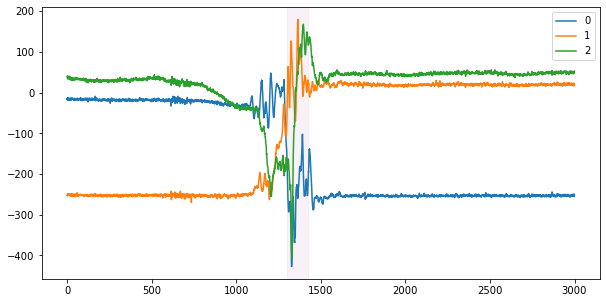

In [9]:
data.plot()
plt.axvspan(begin, end, color='purple', alpha=0.05)
plt.show()

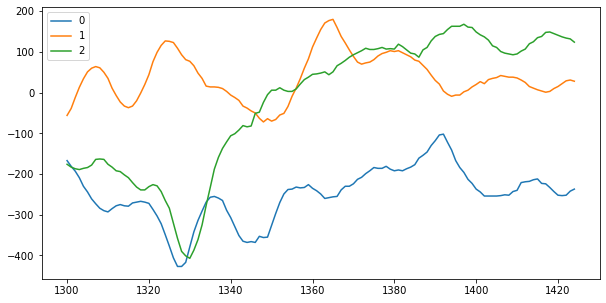

In [10]:
data[begin:end].plot()
plt.show()

In [11]:
#labels[current_file['name']] = {
#    'begin': begin,
#    'end': end
#}
#save_labels()

# Evaluate points as is for classification

In [12]:
data

,0,1,2
0,-16,-252,40
1,-17,-253,40
2,-14,-254,37
3,-18,-250,35
4,-19,-252,38
...,...,...,...
2995,-251,17,46
2996,-253,22,50
2997,-252,20,49
2998,-255,23,52


In [13]:
y = ['red' if i >= begin and i <= end else 'green' for i in range(len(data))]

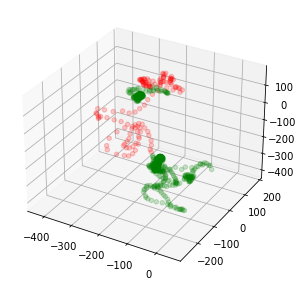

In [14]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(111, projection='3d')

ax.azim = -60
ax.dist = 10
ax.elev = 30


ax.scatter(data[0], data[1], data[2], c=y, alpha=.2)

plt.show()

In [15]:
from sklearn.decomposition import PCA

X = PCA(n_components=2).fit_transform(data)

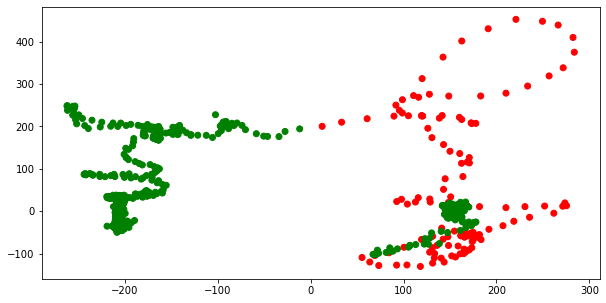

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Since points as is are very noisy, let's try compute some features.

# Features

In [17]:
import sys

sys.path.append('..')

from flod.features_extraction.sisfallfeaturesextraction import SisFallFeaturesExtraction

In [18]:
extraction = SisFallFeaturesExtraction(current_file['path'], begin, end)

In [19]:
size = 200

In [20]:
extraction.compute_features(size, overlap=.9)

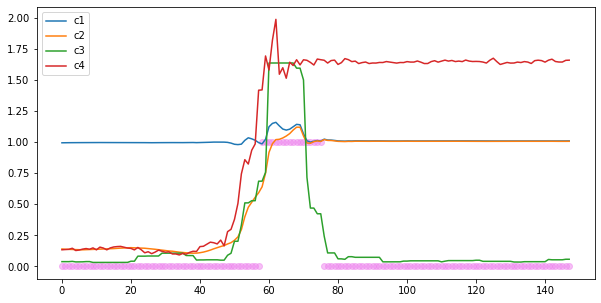

In [29]:
extraction.features.plot(y=['c1','c2','c3','c4'])
plt.scatter(x=range(len(extraction.features)), y=extraction.features['is_fall'], alpha=.5, color='violet')
plt.show()

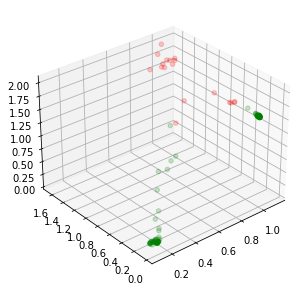

In [22]:
df = extraction.features
color = ['red' if y == 1 else 'green' for y in df['is_fall']]

fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(111, projection='3d')

ax.azim = -130
ax.dist = 10
ax.elev = 30


ax.scatter(df['c2'], df['c3'], df['c4'], c=color, alpha=.2)

plt.show()

In [23]:
X = extraction.features[['c1','c2','c3','c4']]

In [24]:
from sklearn.decomposition import PCA

p = PCA(n_components=3).fit_transform(X)

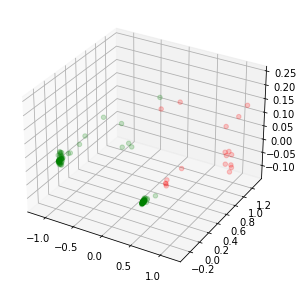

In [26]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(111, projection='3d')

ax.azim = -60
ax.dist = 10
ax.elev = 30


ax.scatter(p[:, 0], p[:, 1], p[:, 2], c=color, alpha=.2)

plt.show()